# Step 1- Importing required libraries

In [7]:
# Importing Libraries/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Step 2- Load the dataset & print the data information

In [3]:
# Loading the dataset by using "pd.read_csv()"
df = pd.read_csv("dataset_assignment1.csv")
# First 5 rows of the dataset
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
# Information about the dataset- column names, null values, data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


#### Obsevation-->
- We can see that the dataset has no null values and the data type for each column is  in integer form.

# Step 3- Understanding the Dataset

### 3.1 Printing out number of samples for each class in the dataset

In [5]:
# printing the number of samples in the dataset for each class
for col in df.columns:
    print(f"Number of samples for class- '{col}':\n{df[col].value_counts()}")
    print("="*40)

Number of samples for class- 'feature1':
1     145
5     130
3     109
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: feature1, dtype: int64
Number of samples for class- 'feature2':
1     385
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: feature2, dtype: int64
Number of samples for class- 'feature3':
1     354
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: feature3, dtype: int64
Number of samples for class- 'feature4':
1     408
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: feature4, dtype: int64
Number of samples for class- 'feature5':
2     387
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: feature5, dtype: int64
Number of samples for class- 'feature6':
1     403
10    132
2      34
5      34
3      30
4      22
8      22
7      10
9       9
6       4
Name: fea

### 3.2 Plot some figures to visualise the dataset

#### 3.2.1 Histogram

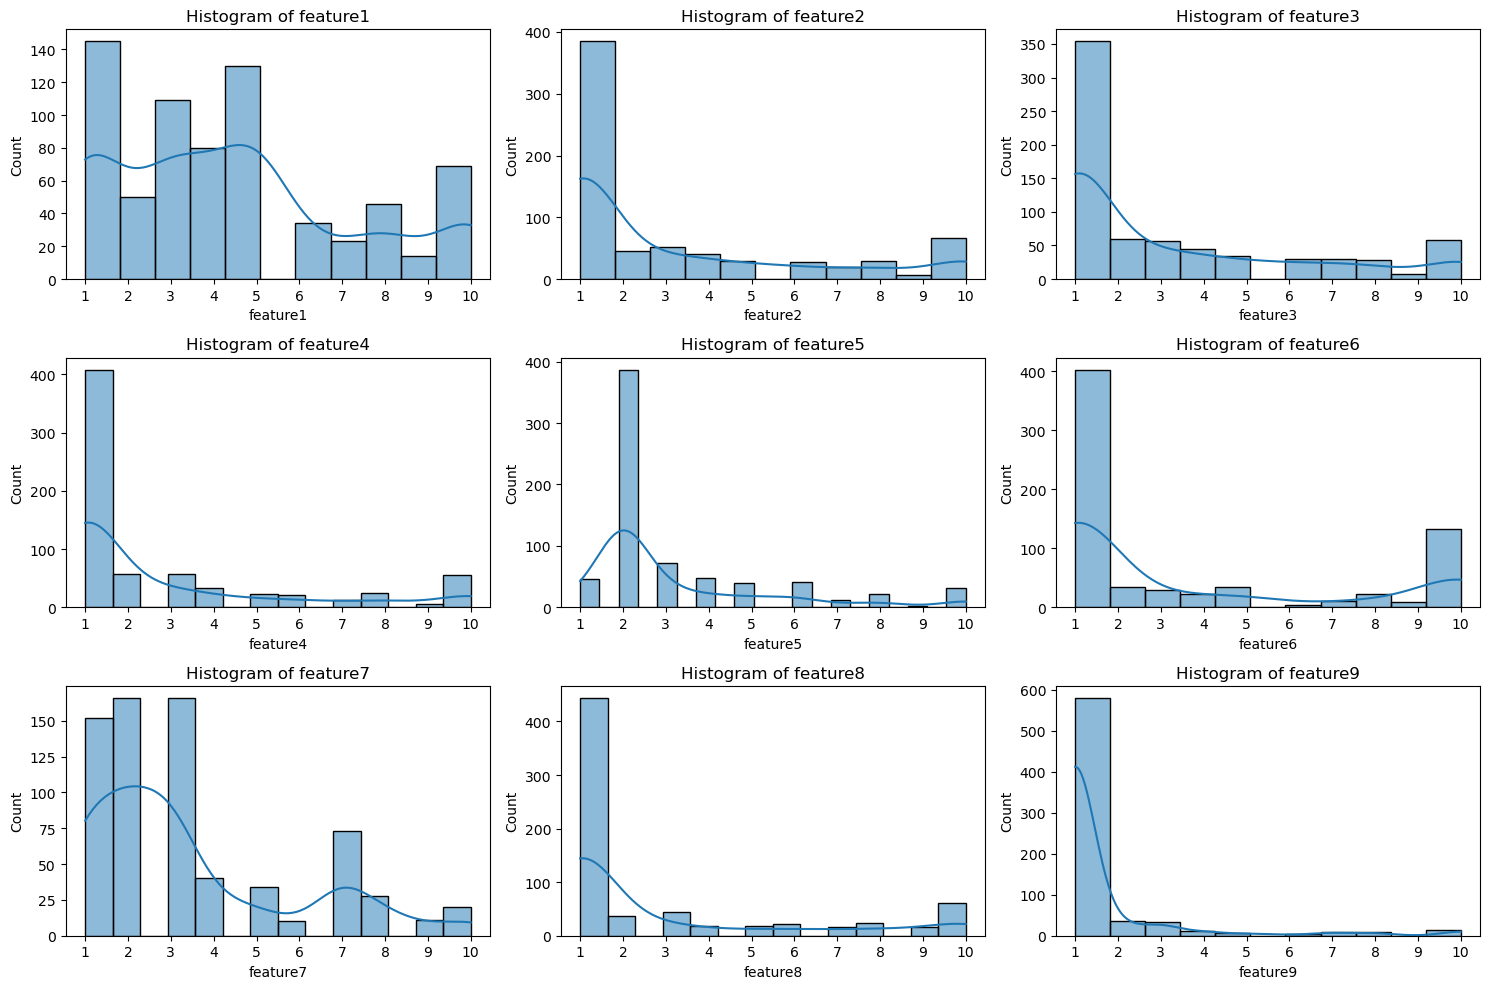

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each input feature and plot a histogram
for i, column in enumerate(df.columns[:-1]):  # Exclude the output column - "class"
    ax = axes[i]
    sns.histplot(df[column], ax=ax, kde=True)
    ax.set_xticks(range(1,11))
    ax.set_title(f"Histogram of {column}")

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### 3.2.2 Boxplot

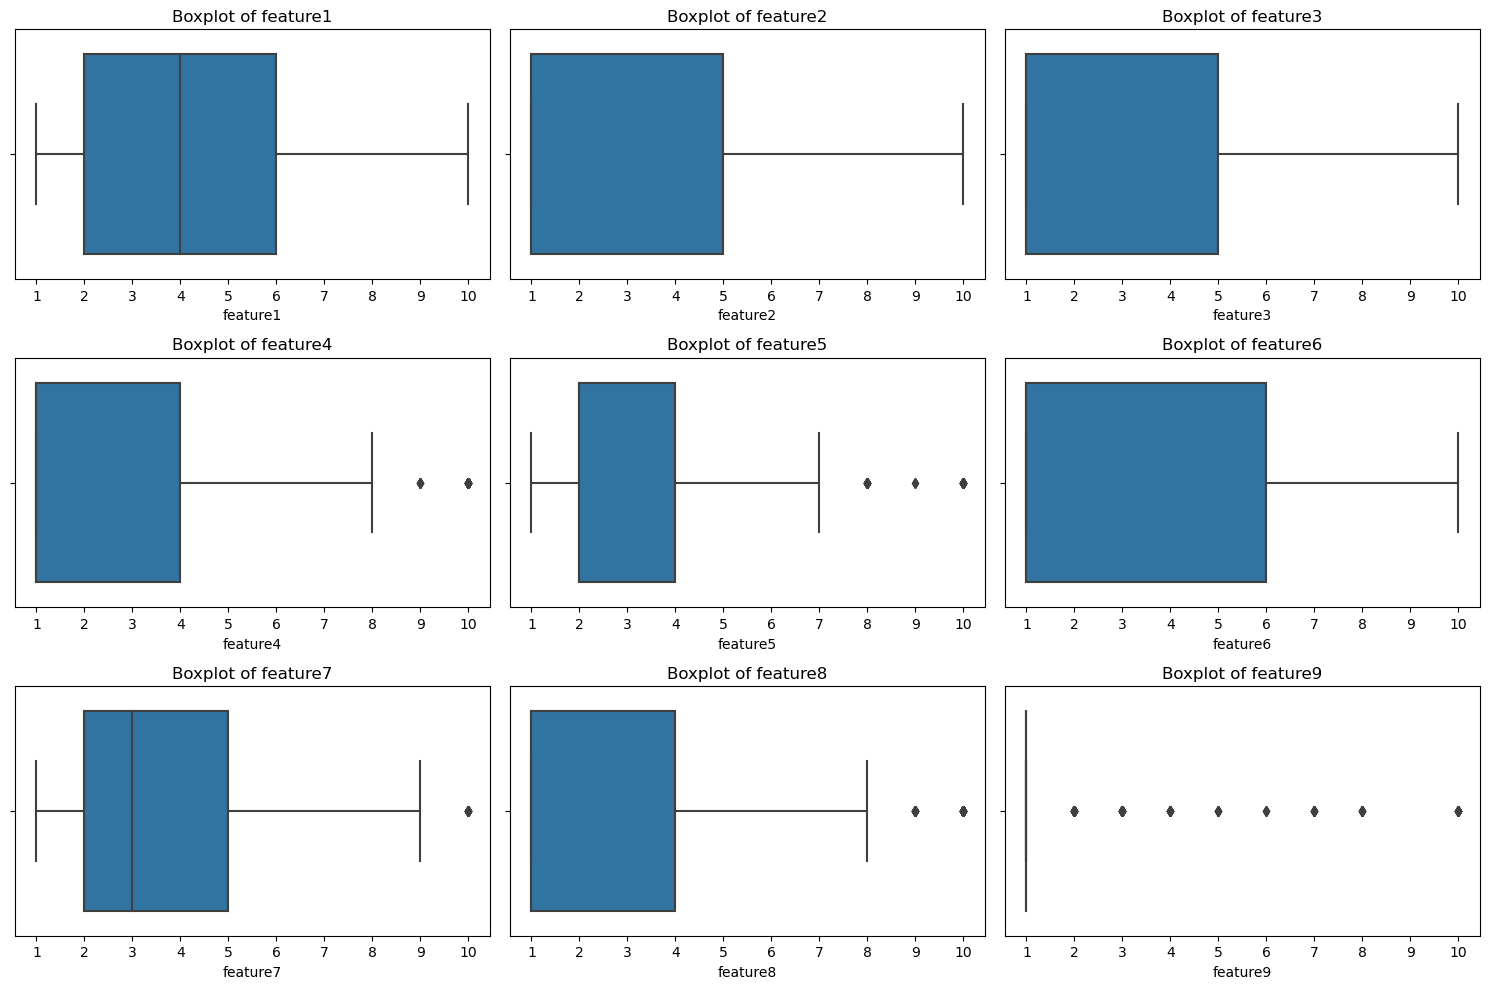

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each input feature and plot a histogram
for i, column in enumerate(df.columns[:-1]):  # Exclude the output column - "class"
    ax = axes[i]
    sns.boxplot(df[column], ax=ax)
    ax.set_xticks(range(1,11))
    ax.set_title(f"Boxplot of {column}")

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### 3.2.3 Pairplot

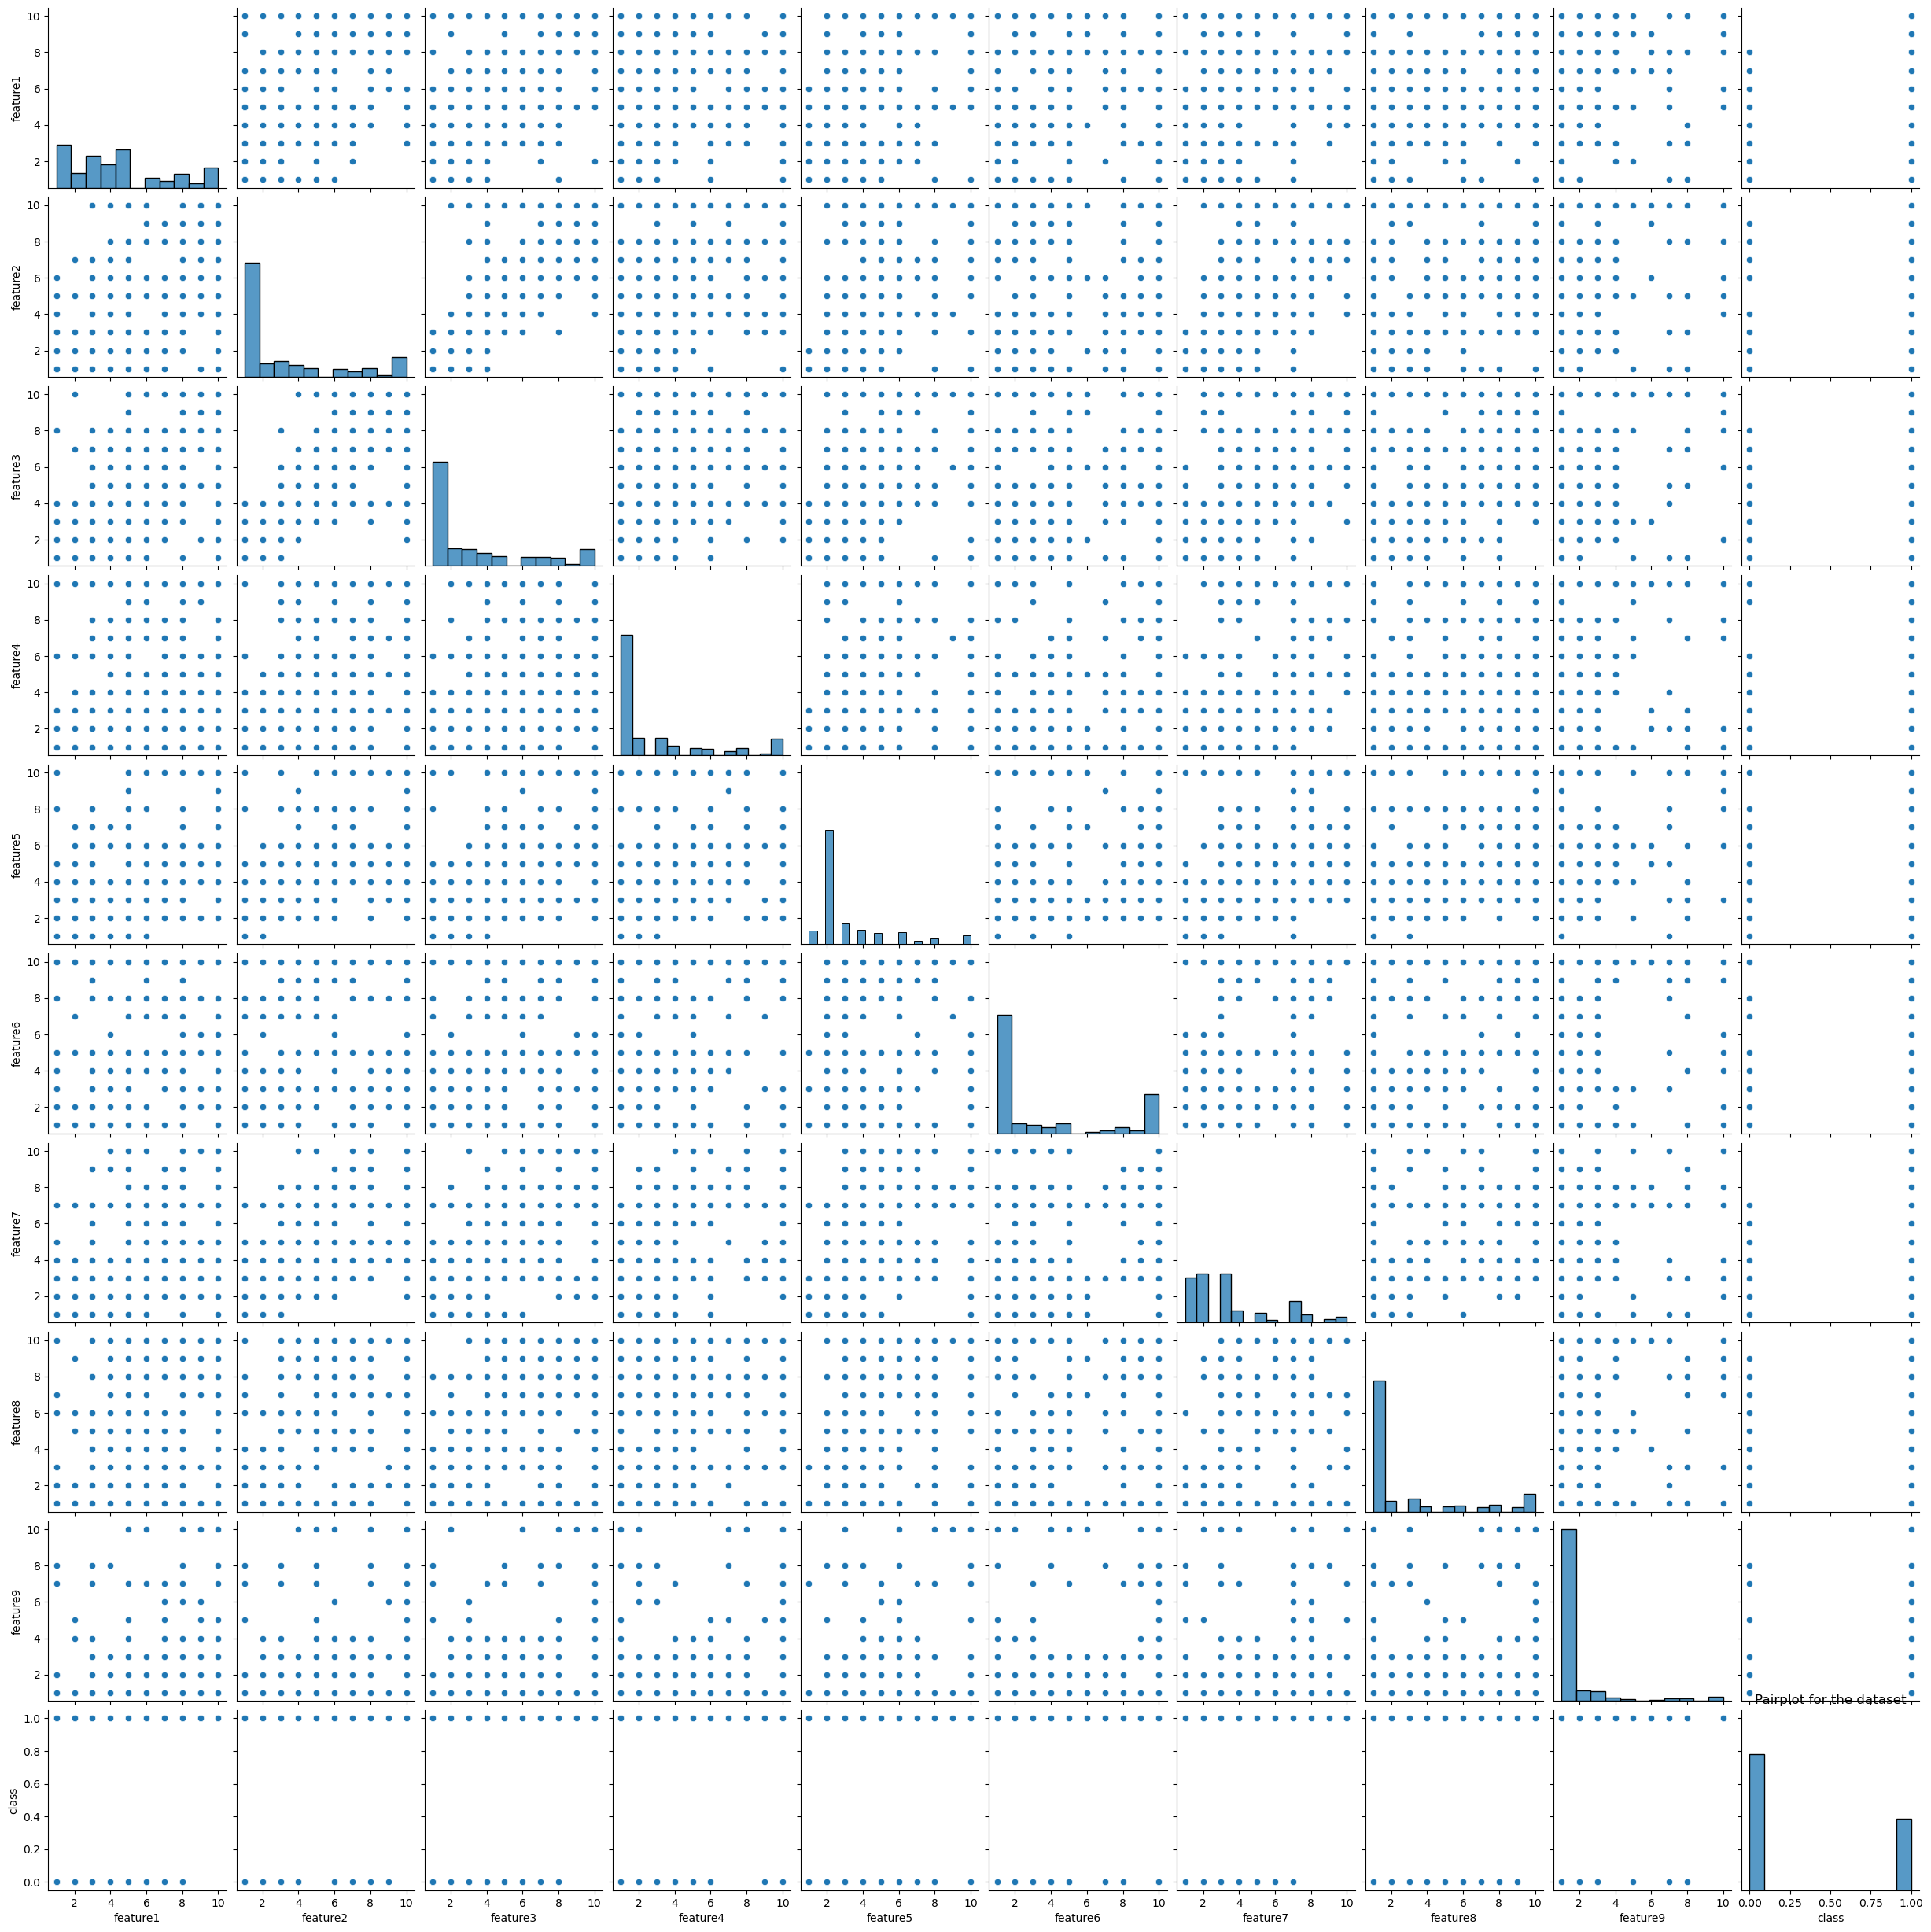

In [43]:
# Printing the pairplot for the whole dataset
sns.pairplot(df)
plt.title("Pairplot for the dataset")
plt.show()

#### Observation-->
- From the histogram we can say mostly all of the features are left skewed.
- From the boxplot we can construct there are few outlies in the dataset, specially for feature9, its highly skewed to the left (580 records just for 1) so there are more outliers compare to the other features.
- From the pairplot, if we look at the scatterplots , we can construct that the features are not making any pattern as such

### 3.3 Statistical Description of the input features

In [45]:
# Printing the statistical description
print("Statistical description of each input feature:")
print("="*45)
df.loc[:, df.columns != "class"].describe()

Statistical description of each input feature:


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,4.415714,3.131429,3.204286,2.804286,3.214286,3.557143,3.437143,2.864286,1.588571
std,2.814236,3.050343,2.970958,2.854153,2.213193,3.613026,2.436676,3.052265,1.713995
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### Observation-->
- We can see here that every feature has the minimum value of 1 to maximum value 10 and there are 700 count for each feature.
- For the output feature "class", there are two unique values 0 and 1, as this is a binary classification problem. That's why I showcase the statistical description for the input features only.

# Step 4- Splitting the dataset into training and testing dataset

In [10]:
# Spliting into independent features and dependent/output features
X=df.iloc[:,:-1] # Independent features - "feature1"..."feature9"
y=df.iloc[:,-1]  # Dependent feature - "class"

# Importing train_test_split from scikit-learn
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing dataset (i.e., 80% vs 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# N-fold cross-validation can be implemented through sklearn provided method: cross_val_score() function
from sklearn.model_selection import KFold  #Split dataset into k consecutive folds (with shuffling)
cv=KFold(n_splits=5,shuffle=True)
from sklearn.model_selection import cross_val_score

# Step 5- Classification Algorithms

## 5.1 Decision Tree

In [12]:
# Importing the DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

### 5.1.1 Decision Tree Prepruning and Hyperparameter Tuning

In [13]:
# Creating a dictionary which we will refer as param_grid in the GridSearchCV 
parameter={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":range(1,16),
    "max_features":["auto","sqrt","log2"]
}

In [14]:
# Importing GridSearchCV from sklearn which basically go through all the combinations and later on give us the best parameters
from sklearn.model_selection import GridSearchCV
# Creating a variable which refers the instance of the GridSearchCV
clf_dt=GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=5,scoring="accuracy")
# Fit the GridSearchCV on the training dataset
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 16),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [15]:
## Best parameters for the model using Decision Tree
clf_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

### 5.1.2 Training the model with the best parameters and using cross validation

In [16]:
# Training the model with best parameters
# Creating a variable which refers to an instance of DecisionTreeClassifier with best parameters that we got from the above step
classifier_dt_best=clf_dt.best_estimator_
# Which is equivalent to (for example, as the best parameter changes each time we perform GridSearchCV)---> classifier_dt_best=DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features="sqrt",splitter="random")

In [17]:
## Using to cross validation to train the model and observing performance metrices

# providing a list of different performance metrics, which will be used in the for loop
scores=["accuracy","precision","recall","f1_macro"]  
# creating a empty list to store the average scores of the model during the training period
avg_score=[]
# using the for loop to iterate through the above scores list and perfome the below instructions
for i in scores:
    # this will provide us the particular score that we are using from the scores list
    scores_dt=cross_val_score(classifier_dt_best,X_train,y_train,scoring=i,cv=cv)
    # we are appending the mean of scores which we've got from the above process
    avg_score.append(scores_dt.mean().round(4))

# Creating a pandas dataframe for better understanding of the evaluation metrics
score_dt=pd.DataFrame(avg_score)
score_dt["Method"]=scores
score_dt["Score"]=score_dt[0]
score_dt.drop(columns=0,inplace=True)
score_dt

,Method,Score
0,accuracy,0.9375
1,precision,0.9136
2,recall,0.8904
3,f1_macro,0.9366


#### Observation-->
- The evaluation matrics may change each time we perform the cross validation to train the model.
- But on an average we can see the accuracy score, precisionn score, recall score,f1-macro is on an average 93%, 92%, 90% 92%, respectively.


### 5.1.3 Test the model with best obtained model from the above stage

In [18]:
## Fitting the model with best parameters on training dataset
classifier_dt_best.fit(X_train, y_train)
## Prediction with best parameters
y_pred_dt=classifier_dt_best.predict(X_test)

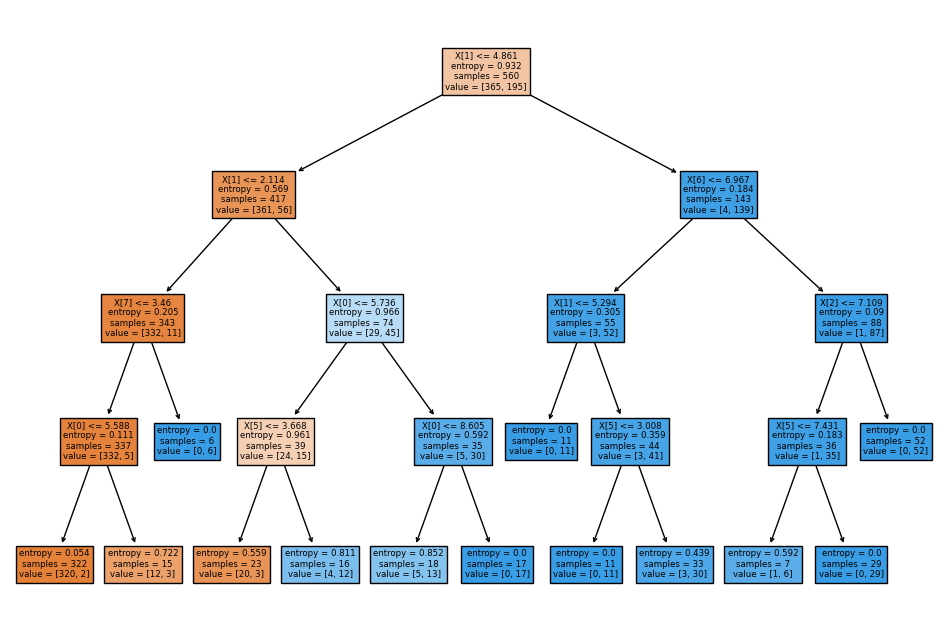

In [19]:
## Plotting the decision tree
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(classifier_dt_best, filled=True)
plt.show()

### 5.1.4 Confusion Metrics

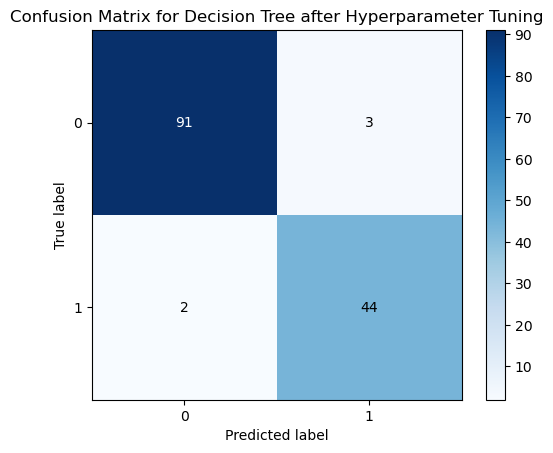

In [20]:
# Plotting the confusion matrix for Decision Tree after hyperparameter tuning
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=False, title="Confusion Matrix for Decision Tree after Hyperparameter Tuning")
plt.show()

### 5.1.5 Evaluation Metrics

In [21]:
# Importing the evaluation matrics and classification report
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
print("classification_report:\n",classification_report(y_pred_dt,y_test))
accuracy  = accuracy_score(y_test,y_pred_dt).round(4)
precision = precision_score(y_test,y_pred_dt).round(4)
recall = recall_score(y_pred_dt,y_test).round(4)
f1 = f1_score(y_pred_dt,y_test).round(4)

# Creating a Dataframe for the Evaluation Metrics
scores_dt=[accuracy,precision,recall,f1]
test_score_dt=pd.DataFrame(scores_dt)
test_score_dt["Method"]=["Accuracy","Precision","Recall","F1 Score"]
test_score_dt["Scores"]=test_score_dt[0]
test_score_dt.drop(columns=0,inplace=True)
test_score_dt

classification_report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.96      0.94      0.95        47

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



,Method,Scores
0,Accuracy,0.9643
1,Precision,0.9362
2,Recall,0.9362
3,F1 Score,0.9462


#### Observation-->
- The evaluation matrics may change each time we perform the prediction on test data.
- But on an average we can see the accuracy score, precisionn score, recall score,f1-score is on an average 94%, 93%, 93% 91%, respectively.

## 5.2 K-Nearest Neighbour Classifier

In [22]:
# Importing the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

### 5.2.1 Hyperparameter Tuning for KNN 

In [23]:
# Creating a dictionary which we will refer as param_grid in the GridSearchCV 
param_grid={
    "n_neighbors":range(1,16),
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"]
}

In [24]:
# Importing GridSearchCV from sklearn which basically go through all the combinations and later on give us the best parameters
from sklearn.model_selection import GridSearchCV
# Creating a variable which refers the instance of the GridSearchCV
clf_knn=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,refit=True,cv=5)
# Fit the GridSearchCV on the training dataset
clf_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 16)})

In [25]:
# Best k value for the model
clf_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 9}

### 5.2.2 Training the model with best K-value and using cross validation

In [26]:
## Training the model with best k value, which is 9 in this case
# Creating a variable which refers to an instance of KNeighborsClassifier with best parameters that we got from the above step
classifier_knn_best=clf_knn.best_estimator_
# Which is equivalent to---> classifier_knn_best=KNeighborsClassifier(n_neighbors=9, algorithm="auto")

In [27]:
## Using to cross validation to train the model and observing performance metrices

# providing a list of different performance metrics, which will be used in the for loop
scores=["accuracy","precision","recall","f1_macro"]  
# creating a empty list to store the average scores of the model during the training period
avg_score=[]
# using the for loop to iterate through the above scores list and perfome the below instructions
for i in scores:
    # this will provide us the particular score that we are using from the scores list
    scores_knn=cross_val_score(classifier_knn_best,X_train,y_train,scoring=i,cv=cv)
    # we are appending the mean of scores which we've got from the above process
    avg_score.append(scores_knn.mean().round(4))
    
# Creating a pandas dataframe for better understanding & visualisation of the score
score_knn=pd.DataFrame(avg_score)
score_knn["Method"]=scores
score_knn["Score"]=score_knn[0]
score_knn.drop(columns=0,inplace=True)
score_knn

,Method,Score
0,accuracy,0.9625
1,precision,0.9479
2,recall,0.9568
3,f1_macro,0.9623


#### Observation-->
- The evaluation matrics may change each time we perform the cross validation to train the model.
- But on an average we can see the accuracy score, precisionn score, recall score,f1-macro is on an average 97%, 94%, 94% 96%, respectively.

### 5.2.3 Test the model with best obtained model from the above stage

In [28]:
# Fit the KNeighborsClassifier on the training dataset
classifier_knn_best.fit(X_train,y_train)
## Prediction for KNN
y_pred_knn=classifier_knn_best.predict(X_test)

### 5.2.4 Confusion Metics

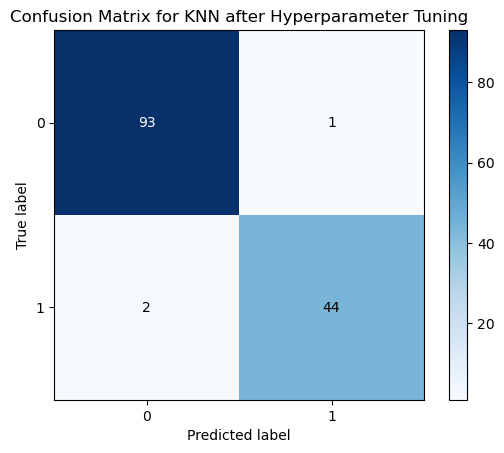

In [29]:
# Plotting the confusion matrix for Decision Tree after hyperparameter tuning
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=False, title="Confusion Matrix for KNN after Hyperparameter Tuning")
plt.show()

### 5.2.5 Evaluation Metrics

In [30]:
# Importing the evaluation matrics and classification report
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
print("classification_report:\n",classification_report(y_pred_knn,y_test))
accuracy  = accuracy_score(y_test,y_pred_knn).round(4)
precision = precision_score(y_test,y_pred_knn).round(4)
recall = recall_score(y_pred_knn,y_test).round(4)
f1 = f1_score(y_pred_knn,y_test).round(4)

# Creating a Dataframe for the Evaluation Metrics
scores_dt=[accuracy,precision,recall,f1]
test_score_knn=pd.DataFrame(scores_dt)
test_score_knn["Method"]=["Accuracy","Precision","Recall","F1 Score"]
test_score_knn["Scores"]=test_score_knn[0]
test_score_knn.drop(columns=0,inplace=True)
test_score_knn

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.96      0.98      0.97        45

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



,Method,Scores
0,Accuracy,0.9786
1,Precision,0.9778
2,Recall,0.9778
3,F1 Score,0.9670


#### Observation-->
- The evaluation matrics may change each time we perform the prediction on test data.
- But on an average we can see the accuracy score, precisionn score, recall score,f1-score is on an average 97.5%, 97.5%, 97.5% 96%, respectively.

## 5.3 Logistic Regression

In [31]:
# Importing the KNeighborsClassifier from scikit-learn
from sklearn.linear_model import LogisticRegression

### 5.3.1 Hyperparameter Tuning for Logistic Regerssion

In [32]:
# Creating a dictionary which we will refer as param_grid in the GridSearchCV 
param_grid={
    "penalty":["l1","l2","elasticnet"],
    "C":[1,10,20,30],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [33]:
# Importing GridSearchCV from sklearn which basically go through all the combinations and later on give us the best parameters
from sklearn.model_selection import GridSearchCV
# Creating a variable which refers the instance of the GridSearchCV
clf_logistic=GridSearchCV(LogisticRegression(),param_grid=param_grid,refit=True,cv=5)
# Fit the GridSearchCV on the training dataset
clf_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [34]:
# Best parameters for the model
clf_logistic.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

### 5.3.2 Training the model with the best parameters and using cross validation

In [35]:
# Training the model with best parameters
# Creating a variable which refers to an instance of LogisticRegression with best parameters that we got from the above step
classifier_logistic_best=clf_logistic.best_estimator_
# Which is equivalent to---> LogisticRegression(C=1,penalty="l1",solver="liblinear")

In [36]:
## Using to cross validation to train the model and observing performance metrices

# providing a list of different performance metrics, which will be used in the for loop
scores=["accuracy","precision","recall","f1_macro"]  
# creating a empty list to store the average scores of the model during the training period
avg_score=[]
# using the for loop to iterate through the above scores list and perfome the below instructions
for i in scores:
    # this will provide us the particular score that we are using from the scores list
    scores_logistic=cross_val_score(LogisticRegression(),X_train,y_train,scoring=i,cv=cv)
    # we are appending the mean of scores which we've got from the above process
    avg_score.append(scores_logistic.mean().round(4))
    
# Creating a pandas dataframe for better understanding & visualisation of the score
score_logistic=pd.DataFrame(avg_score)
score_logistic["Method"]=scores
score_logistic["Score"]=score_logistic[0]
score_logistic.drop(columns=0,inplace=True)
score_logistic

,Method,Score
0,accuracy,0.9643
1,precision,0.9473
2,recall,0.9489
3,f1_macro,0.9562


#### Observation-->
- The evaluation matrics may change each time we perform the cross validation to train the model.
- But on an average we can see the accuracy score, precisionn score, recall score,f1-macro is on an average 96%, 94%, 95% 95%, respectively.

### 5.3.3 Test the model with best obtained model from the above stage

In [37]:
# Fit the LogisticRegression on the training dataset
classifier_logistic_best.fit(X_train,y_train)
# Prediction for Logistics Regression
y_pred_logistic=classifier_logistic_best.predict(X_test)

### 5.3.4 Confusion Metics

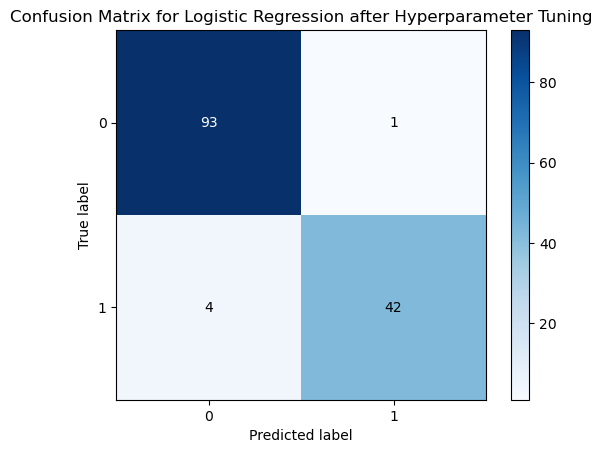

In [38]:
# Plotting the Confusion Matrix for Logistic Regression after hyperparameter tuning
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logistic, normalize=False, title="Confusion Matrix for Logistic Regression after Hyperparameter Tuning")
plt.show()

### 5.3.5 Evaluation Metrics

In [39]:
# Importing the evaluation matrics and classification report
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
print("classification_report:\n",classification_report(y_pred_logistic,y_test))
accuracy  = accuracy_score(y_test,y_pred_logistic).round(4)
precision = precision_score(y_test,y_pred_logistic).round(4)
recall = recall_score(y_pred_logistic,y_test).round(4)
f1 = f1_score(y_pred_logistic,y_test).round(4)

# Creating a Dataframe for the Evaluation Metrics
scores_dt=[accuracy,precision,recall,f1]
test_score_logistic=pd.DataFrame(scores_dt)
test_score_logistic["Method"]=["Accuracy","Precision","Recall","F1 Score"]
test_score_logistic["Scores"]=test_score_logistic[0]
test_score_logistic.drop(columns=0,inplace=True)
test_score_logistic

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        97
           1       0.91      0.98      0.94        43

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



,Method,Scores
0,Accuracy,0.9643
1,Precision,0.9767
2,Recall,0.9767
3,F1 Score,0.9438


#### Observation-->
- The evaluation matrics may change each time we perform the prediction on test data.
- But on an average we can see the accuracy score, precisionn score, recall score,f1-score is on an average 95%, 97%, 97% 93%, respectively.